# Проект:

# Применение машинного обучения в прогнозировании оттока клиентов фитнес-центра

In [1]:
import pandas as pd

In [2]:
#прочитаем данные из csv-файла
gym_churn = pd.read_csv('datasets/gym_churn.csv')

In [3]:
#выведем размер
gym_churn.shape

(4000, 14)

In [4]:
#выведем первые 5 строк
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
#выведем сводную информацию о наборе данных
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Всего в данных 4000 строк, пропущенных значений нет.

In [6]:
#выведем описательные статистические данные
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* 'Churn' — факт оттока в текущем месяце - <font style="background-color:#ffff00">в текущем месяце ушло 26,5% клиентов</font>

**Данные пользователя за предыдущий до проверки факта оттока месяц:**

*	'gender' — пол - <font style="background-color:#ffff00">мужчин и женщин примерно поровну</font>
*	'Near_Location' — проживание или работа в районе, где находится фитнес-центр - <font style="background-color:#ffff00">84% клиентов живут или работают непосредственно в районе фитнес-центра</font>
*	'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента) - <font style="background-color:#ffff00">48% сотрудники компаний-партнеров</font>
*	Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента) - <font style="background-color:#ffff00">30% пришли по акции «приведи друга»</font>
*	'Phone' — наличие контактного телефона - <font style="background-color:#ffff00">у 90% указан телефон</font>
*	'Age' — возраст - <font style="background-color:#ffff00">средний возраст клиентов - 29 лет</font>
*	'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах) - <font style="background-color:#ffff00">средний lifetime клиентов - 3,7 месяца</font>

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента**

*	'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год) - <font style="background-color:#ffff00">у 75% клиентов - длительность абонемента не более 6 месяцев</font>
*	'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах) - <font style="background-color:#ffff00">у 75% клиентов - абонемент закончится не позже, чем через 6 месяцев</font>
*	'Group_visits' — факт посещения групповых занятий - <font style="background-color:#ffff00">41% посещает групповые занятия</font>
*	'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента - <font style="background-color:#ffff00">в среднем посещают фитнес-центр 1,9 раз в неделю, 75% клиентов посещают центр 2,5 раза в неделю (за все время с начала действия абонемента)</font>
*	'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц - <font style="background-color:#ffff00">в среднем посещают фитнес-центр 1,8 раз в неделю, 75% клиентов посещают центр 2,5 раза в неделю (за предыдущий месяц)</font>
*	'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон - <font style="background-color:#ffff00">средняя суммарная выручка от других услуг - 147</font>


In [7]:
#Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался
gym_churn.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Среди ушедших: 

* меньше клиентов, которые живут в районе фитнес-центра
* меньше, пришедших из компаний-партнеров
* меньше, пришедших по промо
* средняя продолжительность контракта 1,7
* меньше посещают групповые занятия
* средний возраст около 27
* меньше сердний чек за другие услуги
* среднее количество месяцев до окончания контракта 1,7
* средний lifetime - 0.99
* в среднем с начала действия абонемента посещали фитнес 1,47 раз в неделю
* за последний месяц 1,05 раз в неделю

Сильно отличаются средние значения признаков в группах:

* Сотрудники компаний-партнеров
* Клиенты пришедшие по промо
* Длительность контракта
* Среднее количество посещений групповых тренировок
* Lifetime
* Средняя частота посещений фитнес-центра за весь период контракта и за последний месяц

Построим столбчатые гистограммы и распределения признаков для тех, кто **<font color='grey'>ушёл (отток) (1)</font>** и тех, кто **<font color='green'>остался (не попали в отток) (0)</font>**

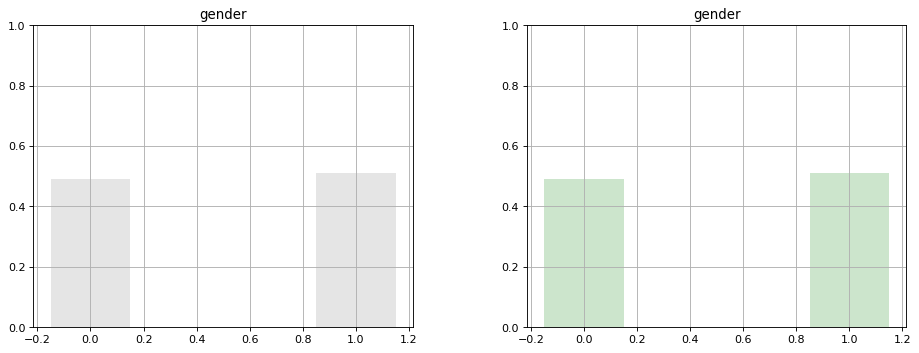

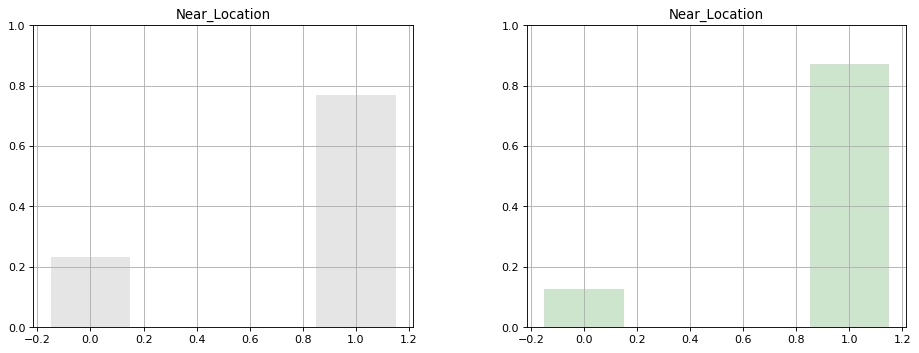

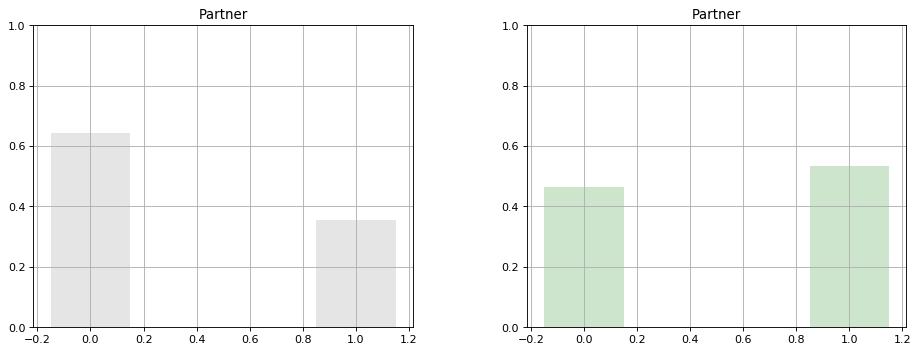

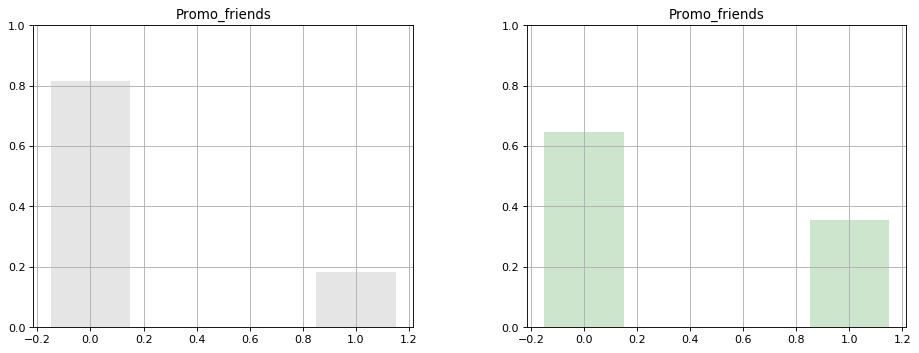

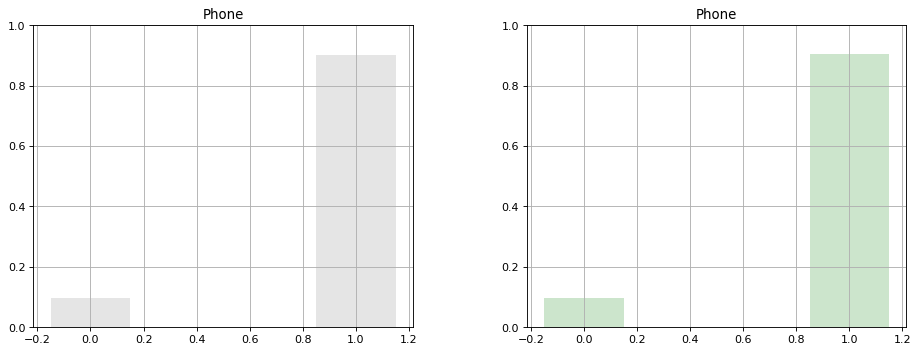

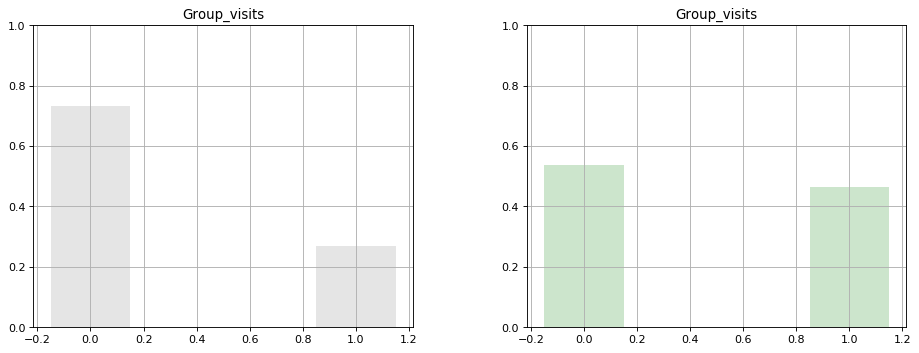

In [8]:
#импортируем модуль
from matplotlib import pyplot as plt

# для бинарных и дискретных признаков с малым числом значений выведем гистограммы
binary_columns = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']

for col in binary_columns:
    plt.subplots(figsize = (30, 5), dpi= 80)
    gym_churn.query('Churn == "1"').hist(col, bins=[x-0.5 for x in range(0, 3)], rwidth=0.3, density=True, alpha = 0.2, \
                                         ax = plt.subplot(141), color = 'grey')
    plt.ylim([0, 1])
    gym_churn.query('Churn != "1"').hist(col, bins=[x-0.5 for x in range(0, 3)], rwidth=0.3, density=True, alpha = 0.2, \
                                         ax = plt.subplot(142), color = 'green')
    plt.ylim([0, 1])
    plt.show()

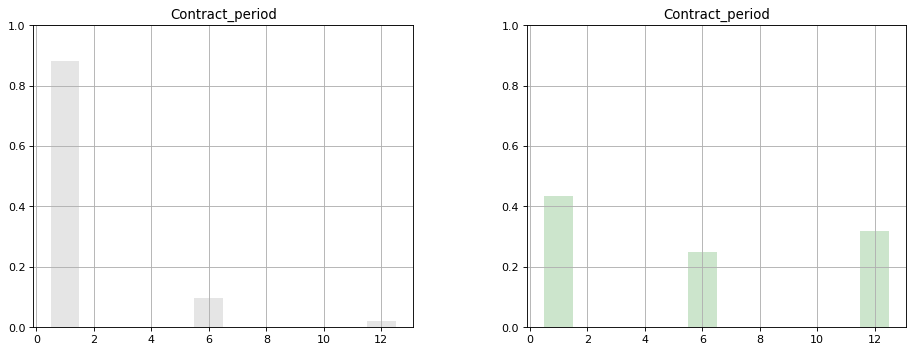

In [9]:
plt.subplots(figsize = (30, 5), dpi= 80)
gym_churn.query('Churn == "1"').hist('Contract_period', bins=[x-0.5 for x in range(1, 14)], \
                                     density=True, alpha = 0.2, ax = plt.subplot(141), color = 'grey')
plt.ylim([0, 1])
gym_churn.query('Churn != "1"').hist('Contract_period', bins=[x-0.5 for x in range(1, 14)], \
                                     density=True, alpha = 0.2, ax = plt.subplot(142), color = 'green')
plt.ylim([0, 1])
plt.show()

In [10]:
gym_churn.query('Churn == "1"')['Contract_period'].value_counts(normalize=True)

1     0.880302
6     0.098021
12    0.021678
Name: Contract_period, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


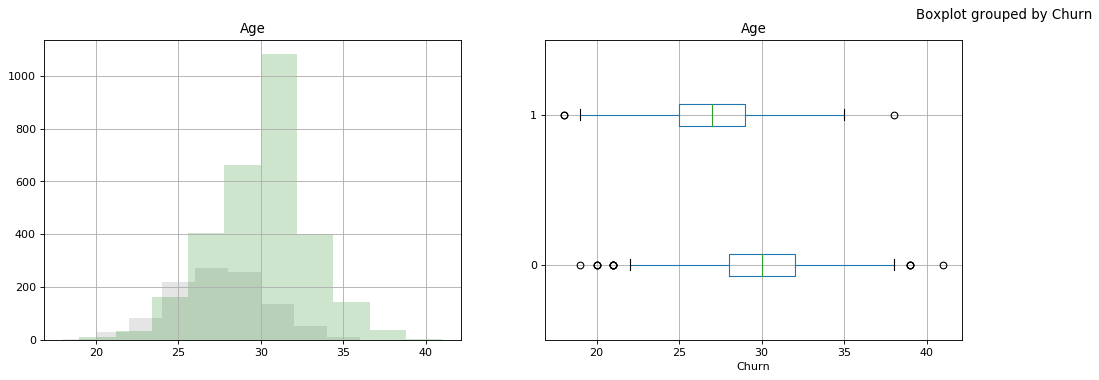

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


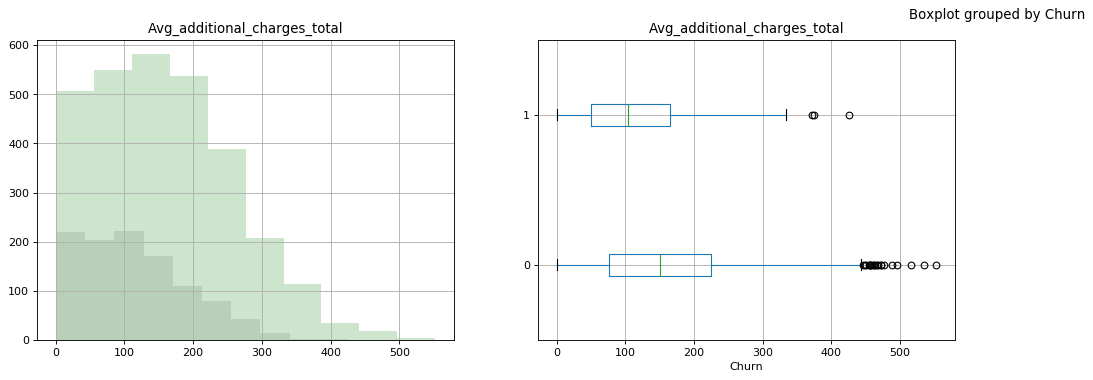

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


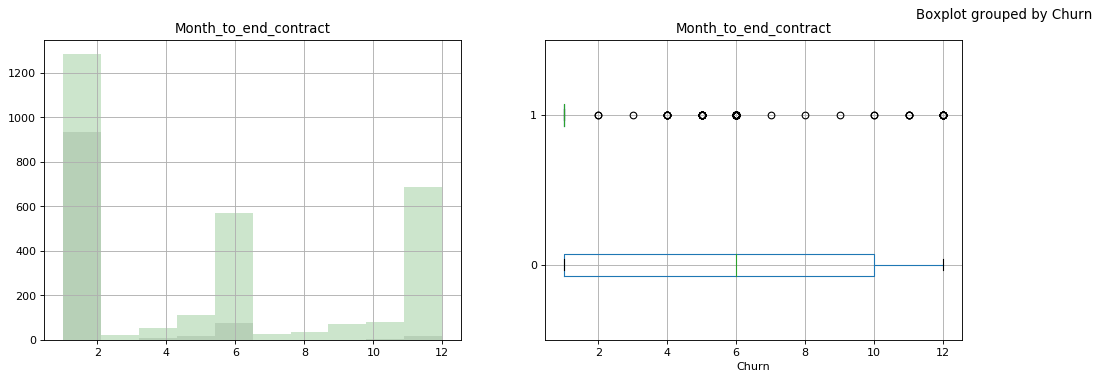

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


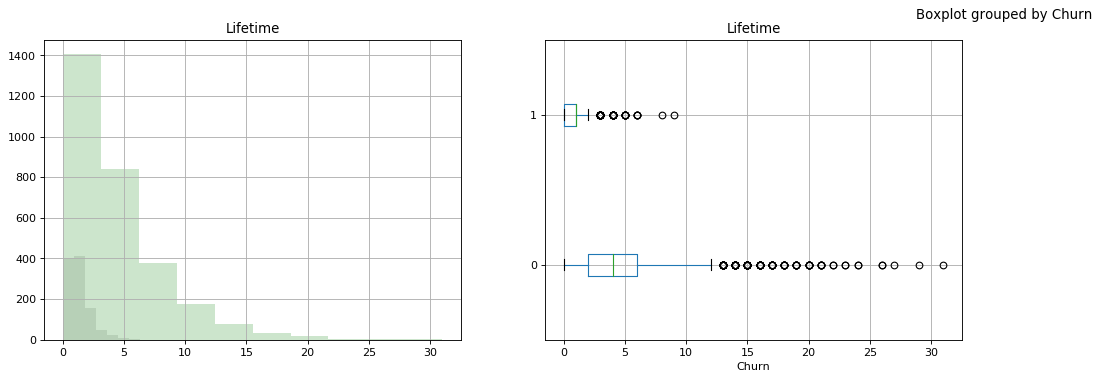

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


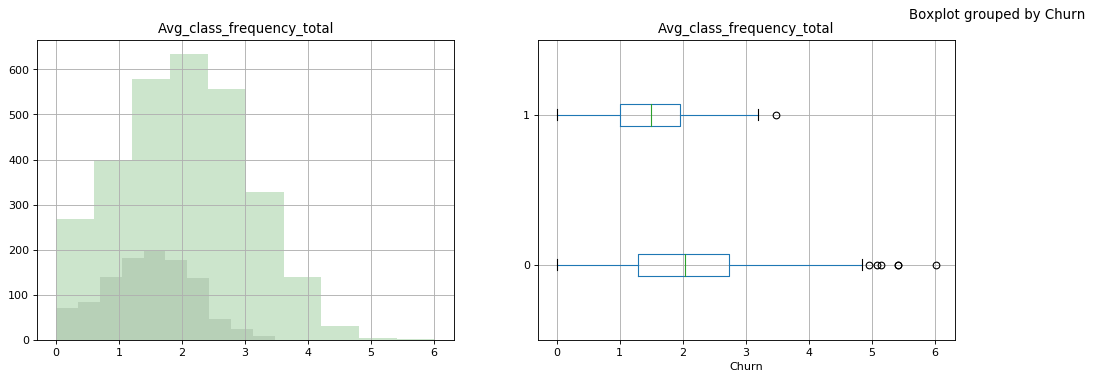

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


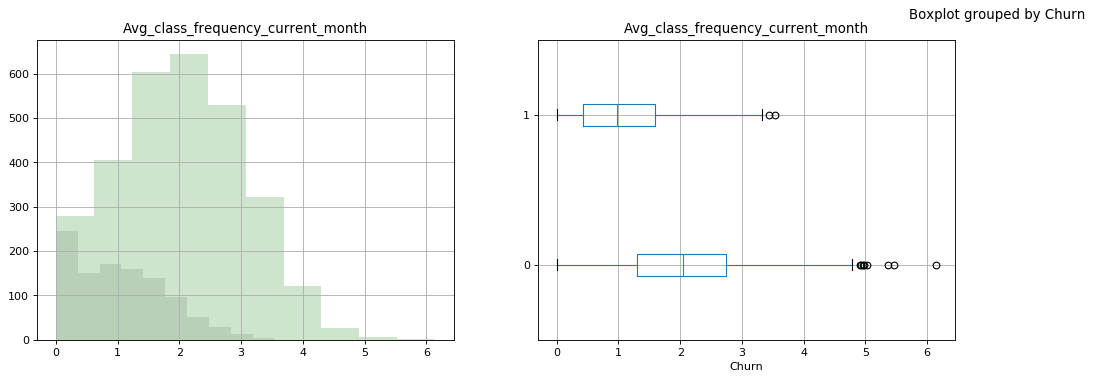

In [11]:
# выведем для остальных признаков гистограмму и боксплот
columns = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

for col in columns:
    plt.subplots(figsize = (30, 5), dpi= 80)
    gym_churn.query('Churn == "1"').hist(col, alpha = 0.2, ax = plt.subplot(141), color = 'grey')
    gym_churn.query('Churn != "1"').hist(col, alpha = 0.2, ax = plt.subplot(141), color = 'green')
    gym_churn.boxplot(col, by='Churn', vert=False, ax = plt.subplot(142))
    plt.show()

Среди клиентов, которые ушли:
* ниже процент тех, кто пришел от компаний партнеров, по промо, через друзей и посещал групповые тренировки,
* клиенты, которые ушли, моложе, тратят значительно меньше денег,
* период контракта у 88% ушедших: 1 месяц, lifetime: 1-2 месяца.

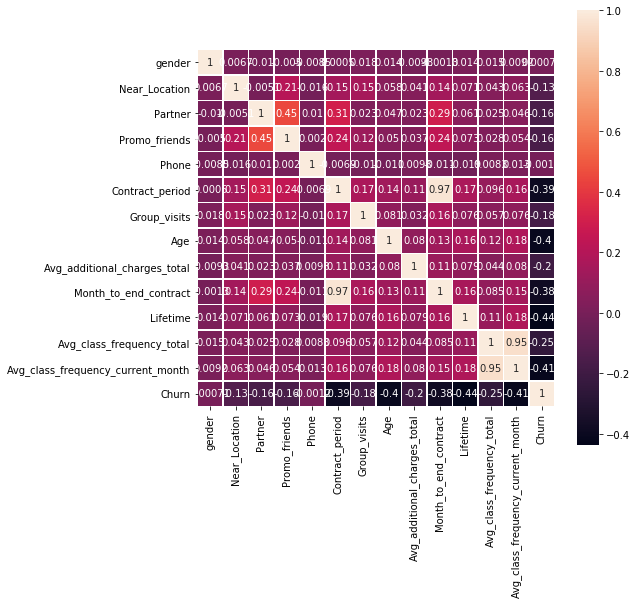

In [12]:
#выведем матрицу корреляций
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 8))
cm = gym_churn.corr()
sns.heatmap(cm, annot = True, square=True, linewidths=.5)
plt.show()

Судя по матрице корреляций, нет признаков, с высокой вероятностью сообщающих правильный ответ (коррелируют с целевой переменной более, чем на 0,9 по модулю). Зато есть две пары скоррелированных признаков: 'Contract_period' - 'Month_to_end_contract' и 'Avg_class_frequency_current_month' - 'Avg_additional_charges_total'.

## Построим модель прогнозирования оттока пользователей

In [13]:
#импортируем модуль
from sklearn.model_selection import train_test_split

#разделим данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('Churn', axis=1)
y = gym_churn['Churn']

#разделяем модель на обучающую (70%), валидационную (15%) и тестовую (15%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [14]:
#импортируем модули
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#создадим функцию, которая будет выводить метрики для каждой модели
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [15]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий, валидационные и тестовые наборы данных
X_train_st = scaler.transform(X_train)
X_val_st = scaler.transform(X_val)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=42)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_val_st)
lr_probabilities = lr_model.predict_proba(X_val_st)[:,1]
# выведем все метрики
print_all_metrics(y_val, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:') 


# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_val_st)
rf_probabilities = rf_model.predict_proba(X_val_st)[:,1]
# выведем все метрики
print_all_metrics(y_val, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:') 

Метрики для модели логистической регрессии:
	Accuracy: 0.94
	Precision: 0.88
	Recall: 0.86
	F1: 0.87
	ROC_AUC: 0.98
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.86
	Recall: 0.79
	F1: 0.83
	ROC_AUC: 0.97


Для гиперпарамтеров мы использовали занчения по умолчанию.

Модель логистической регрессии в данном случае сработала чуть лучше.
Доля правильных ответов, точность и полнота, f1 и roc-auc у нее выше, чем у случайного леса.

Попробуем подобрать для каждой модели оптимальный набор гиперпараметров.

In [16]:
#импортируем модуль
from sklearn.model_selection import RandomizedSearchCV

# Создаем сетку из гиперпараметров для логистической регрессии

# Penalty used to specify the norm used in the penalization
penalty = ['l1', 'l2', 'elasticnet', None]

# Tolerance for stopping criteria.
tol = [0.000000001, 0.001]

# Inverse of regularization strength; must be a positive float
C = [1.0, 2.0]

# Algorithm to use in the optimization problem
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Определяем словарь гиперпараметров для поиска
hyperparameter_grid = {'penalty': penalty,
    'tol': tol,
    'C': C,
    'solver': solver}

# Создаем модель для использования настройки гиперпараметров
model = LogisticRegression(random_state = 42)

# Настройка случайного поиска
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = None, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Тренируем на данных
random_cv.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports on

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got None.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=25, n_jobs=None,
                   param_distributions={'C': [1.0, 2.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                

In [17]:
# запрашиваем у RandomizedSearchCV настройки для лучшей модели с этими параметрами.
random_cv.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=1e-09, verbose=0,
                   warm_start=False)

In [18]:
#полученные настройки отдаем модели для дальнейших испытаний
LR_01 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.001, verbose=0,
                   warm_start=False)

LR_02 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=1e-09, verbose=0,
                   warm_start=False)

In [19]:
# Обучим модели и посмотрим на новые метрики

LR_01.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_01_predictions = LR_01.predict(X_val_st)
lr_01_probabilities = LR_01.predict_proba(X_val_st)[:,1]
# выведем все метрики
print_all_metrics(y_val, lr_01_predictions, lr_01_probabilities , title='Метрики для модели логистической регрессии LR_01:') 

LR_02.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_02_predictions = LR_02.predict(X_val_st)
lr_02_probabilities = LR_02.predict_proba(X_val_st)[:,1]
# выведем все метрики
print_all_metrics(y_val, lr_02_predictions, lr_02_probabilities , title='Метрики для модели логистической регрессии LR_02:') 


Метрики для модели логистической регрессии LR_01:
	Accuracy: 0.94
	Precision: 0.88
	Recall: 0.87
	F1: 0.87
	ROC_AUC: 0.98
Метрики для модели логистической регрессии LR_02:
	Accuracy: 0.94
	Precision: 0.88
	Recall: 0.87
	F1: 0.87
	ROC_AUC: 0.98


Метрики улучшились незначительно.

In [20]:
# Повторим тоже самое для Случайного леса

# Создаем сетку из гиперпараметров для случайного леса
# The number of trees in the forest.
n_estimators = [50, 100, 500, 1000]

# The function to measure the quality of a split.
criterion = ['gini', 'entropy']

# The maximum depth of the tree.
#max_depth = [None]

# The minimum number of samples required to split an internal node
min_samples_split = [1, 2, 3, 4]

# The number of features to consider when looking for the best split
max_features = ['auto', 'sqrt', 'log2']

# A node will be split if this split induces a decrease of the impurity greater than or equal to this value
min_impurity_decrease = [0.001, 1, 2.005, None]


# Определяем словарь гиперпараметров для поиска
hyperparameter_grid = {'n_estimators': n_estimators,
    'criterion': criterion,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
    'min_impurity_decrease': min_impurity_decrease}

# Создаем модель для использования настройки гиперпараметров
model = RandomForestClassifier(random_state = 42)

# Настройка случайного поиска
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = None, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

# Тренируем на данных
random_cv.fit(X, y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<' not supported between instances of 'NoneType' and 'float'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<' not supported between instances of 'NoneType' and 'float'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<' not supported between instances of 'NoneType' and 'float'

  FitF

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<' not supported between instances of 'NoneType' and 'float'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<' not supported between instances of 'NoneType' and 'float'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<' not supported between instances of 'NoneType' and 'float'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [21]:
# запрашиваем у RandomizedSearchCV настройки для лучшей модели с этими параметрами.
random_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [22]:
#полученные настройки отдаем модели для дальнейших испытаний
RF_01 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

RF_02 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [23]:
# Обучим модели и посмотрим на новые метрики

RF_01.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_01_predictions = RF_01.predict(X_val_st)
rf_01_probabilities = RF_01.predict_proba(X_val_st)[:,1]
# выведем все метрики
print_all_metrics(y_val, rf_01_predictions, rf_01_probabilities , title='Метрики для модели случайного леса RF_01:') 

RF_02.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_02_predictions = RF_02.predict(X_val_st)
rf_02_probabilities = RF_02.predict_proba(X_val_st)[:,1]
# выведем все метрики
print_all_metrics(y_val, rf_02_predictions, rf_02_probabilities , title='Метрики для модели случайного леса RF_02:') 


Метрики для модели случайного леса RF_01:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81
	F1: 0.82
	ROC_AUC: 0.97
Метрики для модели случайного леса RF_02:
	Accuracy: 0.91
	Precision: 0.83
	Recall: 0.76
	F1: 0.79
	ROC_AUC: 0.96


Метрики немного ухудшились.

In [24]:
# Коэффициенты линейной регрессии хранятся в атрибуте обученной модели .coef_
# Важность признаков для дерева (одинаково для алгоритмов регрессии и классификации) хранится 
# в атрибуте .feature_importances_
#создадим DataFrame, в который добавим и сравним коэффициенты обеих моделей
feature_weights = (pd.DataFrame(lr_model.coef_)
                   .append(pd.DataFrame(rf_model.feature_importances_).T))
feature_weights.columns = X.columns
feature_weights = feature_weights.T
feature_weights.columns = ['coeff_lr', 'coeff_rf']
feature_weights = abs(feature_weights)
feature_weights.style.highlight_max().highlight_min(color = 'lightgreen')

,coeff_lr,coeff_rf
gender,0.118281,0.011145
Near_Location,0.129761,0.010750
Partner,0.054905,0.012039
Promo_friends,0.248356,0.011125
Phone,0.008191,0.006728
Contract_period,1.046234,0.066535
Group_visits,0.385938,0.015829
Age,1.098187,0.135189
Avg_additional_charges_total,0.519931,0.082549
Month_to_end_contract,0.298880,0.080808


Меньше всего веса в формировании обеих моделей оттока клиентов имеет наличие телефона, наиболее значимым признаком модель логистической регрессии выбрала частоту посещения фитнес-центра за последий месяц, модель случайного леса больше ориентируется на lifetime.

Оценим качество итоговой модели - Логистической регрессии на тестовой выборке.

In [25]:
lr_01_predictions = LR_01.predict(X_test_st)
lr_01_probabilities = LR_01.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(y_test, lr_01_predictions, lr_01_probabilities , \
                  title='Метрики для итоговой модели логистической регрессии на тестовой выборке:') 

Метрики для итоговой модели логистической регрессии на тестовой выборке:
	Accuracy: 0.91
	Precision: 0.88
	Recall: 0.78
	F1: 0.82
	ROC_AUC: 0.97


Доля правильных ответо - 91%, точность - 88%, полнота - 78%. Неплохо.

## Сделаем кластеризацию пользователей

In [27]:
#из модуля для иерархической кластеризации hierarchy импортируем классы модели кластеризации linkage() и dendrogram()
from scipy.cluster.hierarchy import dendrogram, linkage

In [28]:
#Отложим в сторону столбец с оттоком и проведем стандартизацию:
x_sc = scaler.fit_transform(gym_churn.drop(columns = ['Churn']))

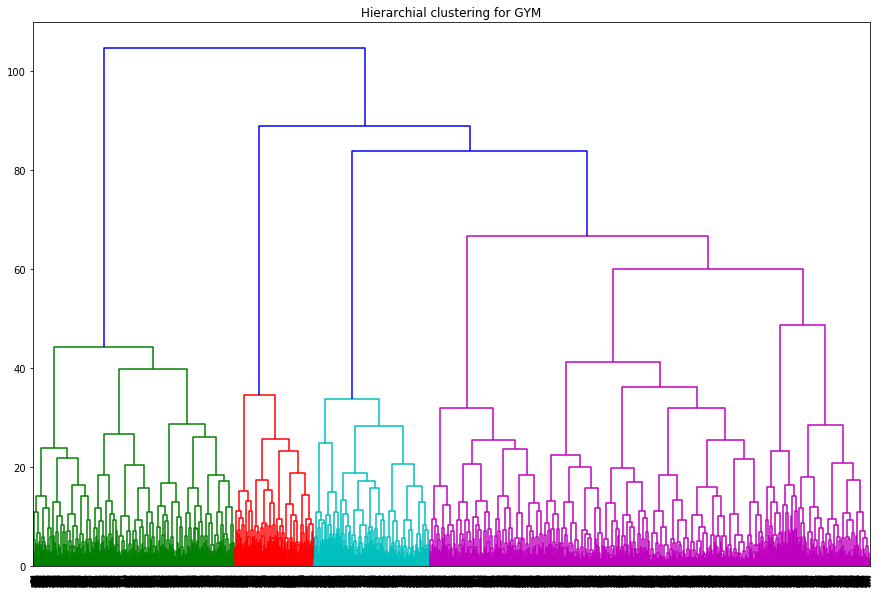

In [29]:
#передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage(). 
#Чтобы диаграмма получилась показательной, лучше передать параметру method значение 'ward'
linked = linkage(x_sc, method = 'ward')
#В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

На основании полученного графика предложенное оптимальное число кластеров - 4 (по количеству цветов).

In [30]:
from sklearn.cluster import KMeans

# задаём модель k_means с числом кластеров 5 (как того требует задание :))
km = KMeans(n_clusters = 5, random_state=42)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 5)
labels = km.fit_predict(x_sc)
# сохраняем метки кластера в поле датасета
gym_churn['cluster_km'] = labels

In [31]:
# выводим статистику по средним значениям признаков по кластеру
cluster_means = gym_churn.groupby(['cluster_km']).mean()

#добавим выделение максимальных и минимальных значений, повернем заголовки вертикально
(cluster_means.reset_index()
 .style
 .hide_index()
 .highlight_max()
 .highlight_min(color = 'lightgreen')
 .set_table_styles(
    [dict(selector="th",props=[('max-width', '60px')]),
     dict(selector="th.col_heading",
          props=[('transform', 'rotateZ(-90deg)'),
                 ('height', '100px')]
         )
    ]
 )
)

cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.484921,1.000000,0.350794,0.238095,1.000000,1.953968,0.341270,28.167460,131.516081,1.861905,2.431746,1.246646,1.011770,0.515079
3,0.559622,0.976387,0.360094,0.237308,0.998819,2.687131,0.469894,30.109799,161.594478,2.478158,4.890201,2.847678,2.846030,0.067296
4,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881742,9.983051,4.748754,1.977676,1.970029,0.027916


* В нулевом кластере клиенты из другого района, серди них меньше всего пришедших по промо, и посещающих групповые тренировки.
* В первом кластере клиенты не указавшие номер телефона, ничем больше особенно не примечательный.
* Во втором класетере клиенты, которые живут в районе фитнес центра, у них самый маленький средний чек, самый низкий средний возраст, длительность контракта, lifetime и они реже всех посещают центр - <font style="background-color:#ffff00">самый высокий процент оттока</font>.
* В третьем кластере самые "возрастные" клиенты :), с самым высоким средним чеком, lifetime, чаще других кластеров посещающие фитнес центр.
* В четвертом кластере самый высокий процент клиентов пришедший из компаний партнеров, по промо, самые длительные контракты, чаще других кластеров посещающие групповые тренировки - <font style="background-color:lightgreen">самый низкий процент оттока</font>.

In [32]:
# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (5,5))
    sns.scatterplot(df[x_name], df[y_name], hue = df[cluster_name],  palette = 'Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [33]:
#помедитировали над графиками с помощью несложной конструкции
#priznak = gym_churn.columns
#for i in priznak:
#    for i_2 in priznak:
#        show_clusters_on_plot(gym_churn, i, i_2, 'cluster_km')

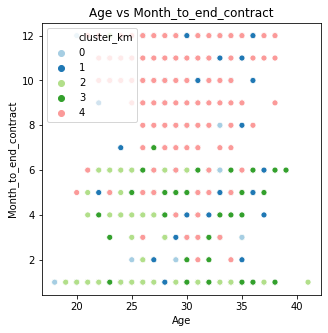

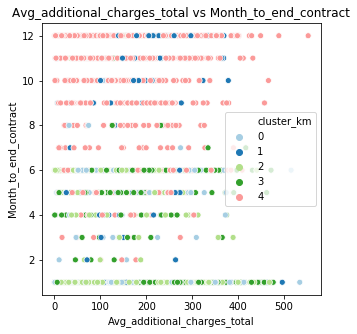

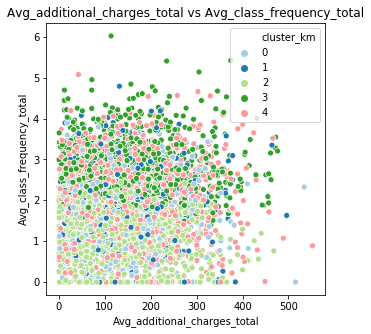

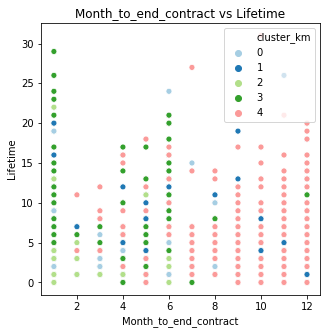

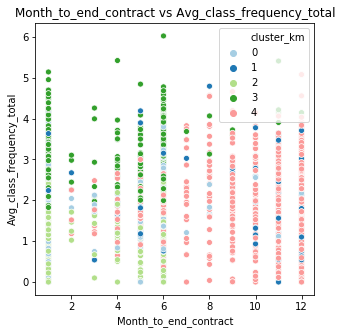

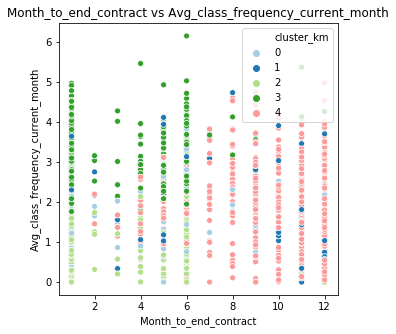

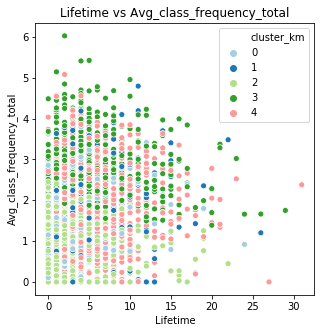

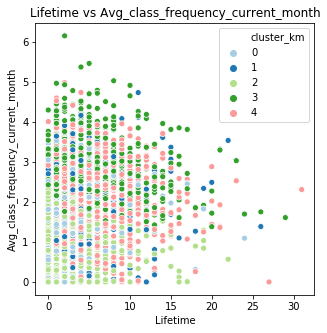

In [34]:
# отрисуем несколько наиболее наглядных графиков для пары признаков
show_clusters_on_plot(gym_churn, 'Age', 'Month_to_end_contract', 'cluster_km') 
show_clusters_on_plot(gym_churn, 'Avg_additional_charges_total', 'Month_to_end_contract', 'cluster_km') 
show_clusters_on_plot(gym_churn, 'Avg_additional_charges_total', 'Avg_class_frequency_total', 'cluster_km') 
show_clusters_on_plot(gym_churn, 'Month_to_end_contract', 'Lifetime', 'cluster_km') 
show_clusters_on_plot(gym_churn, 'Month_to_end_contract', 'Avg_class_frequency_total', 'cluster_km') 
show_clusters_on_plot(gym_churn, 'Month_to_end_contract', 'Avg_class_frequency_current_month', 'cluster_km') 
show_clusters_on_plot(gym_churn, 'Lifetime', 'Avg_class_frequency_total', 'cluster_km') 
show_clusters_on_plot(gym_churn, 'Lifetime', 'Avg_class_frequency_current_month', 'cluster_km') 

Кластеры на некоторых графиках заметно кучкуются.

В бизнесе очень редко можно найти процесс, в котором наблюдения (объекты) имеют явную структуру и ярко выраженное разделение. Поэтому результаты кластеризации часто дополнительно обсуждают эксперты и оценивают в процессе работы.

In [35]:
cluster_means['Churn']

cluster_km
0    0.443564
1    0.267532
2    0.515079
3    0.067296
4    0.027916
Name: Churn, dtype: float64

В кластерах 0, 1 и 2 высокий процент оттока.

Кластеры 3 и 6 более надежны.

## Выводы и рекомендации

* Чтобы снизить процент оттока стоит продумать программу привлечения клиентов на групповые тренировки (акции, пробные занятия, качественная доступная рекламная информация по каждому направлению тренировок).
* Также рекомендуется "увеличивать длительность заключаемых контрактов", предлагая клиентам с месячными контрактами приобрести абонементы на более длительный срок по выгодным условиям.
* Необходимо работать над увеличением частоты посещения фитнес-центра (работать над качеством и разнообразием предоставляемых центром услуг, уровнем тренеров и корпоративной культурой центра).